### **Comprobación de las asunciones de nuestras variable(s) respuesta**

In [22]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import random 

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticos
# ------------------------------------------------------------------------------
from scipy import stats
import researchpy as rp
from scipy.stats import levene


In [23]:
df = pd.read_csv("../datos/bikes_procesado.csv", index_col = 0)
df.head(1)

,day,month,year,season,weekday,workingday,holiday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,January,2018,Winter,Monday,0,0,2,14.110847,80.5833,10.749882,331,654,985


In [24]:
stats.shapiro(df["casual"])

ShapiroResult(statistic=0.885096549987793, pvalue=7.659812252880885e-23)

In [25]:
stats.shapiro(df["registered"])

ShapiroResult(statistic=0.9843854308128357, pvalue=5.023125027037167e-07)

In [26]:
stats.shapiro(df["cnt"])

ShapiroResult(statistic=0.980247974395752, pvalue=2.31170904640976e-08)

`Como podemos comprobar, ninguna de nuestras potenciales variables respuesta cumplen con la asunción de normalidad. A continuación mostramos sus histogramas.`

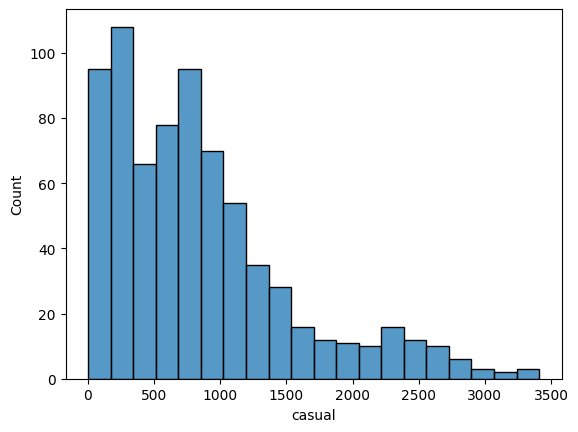

In [27]:
sns.histplot(x= "casual", data = df);

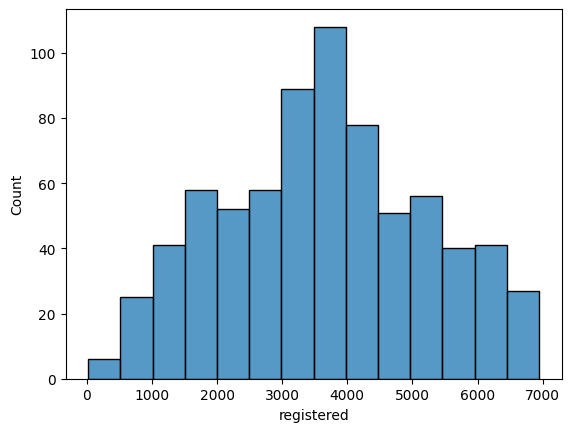

In [28]:
sns.histplot(x= "registered", data = df);

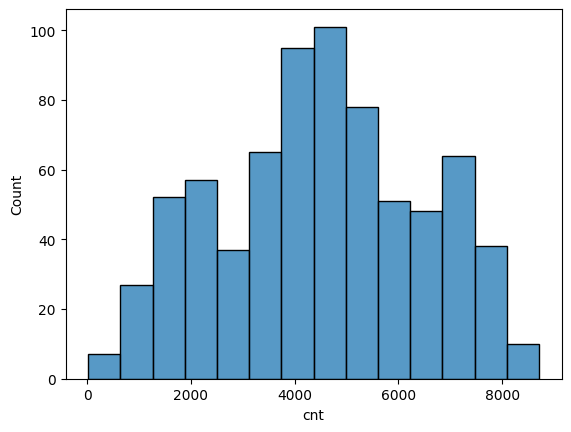

In [29]:
sns.histplot(x= "cnt", data = df);

`Intentamos normalizar "registered" primero, ya que es la que más se aproxima a una distribución normal:`

In [30]:
df["registered_log"] = df["registered"].apply(lambda x: np.log(x) if x > 0 else 0)

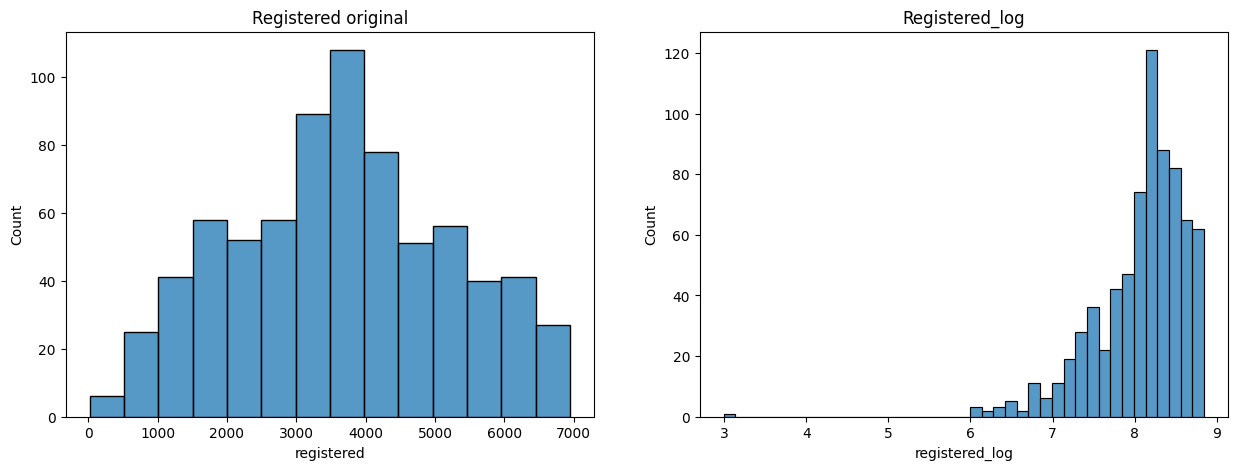

In [31]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Registered original')
axes[1].set_title('Registered_log')

sns.histplot(df["registered"] ,ax = axes[0])
sns.histplot(df["registered_log"], ax = axes[1]);

In [32]:
df["registered_boxcox"], lambda_ajustada = stats.boxcox(df["registered"])


In [33]:
df.head(1)

,day,month,year,season,weekday,workingday,holiday,weathersit,temp,hum,windspeed,casual,registered,cnt,registered_log,registered_boxcox
0,1,January,2018,Winter,Monday,0,0,2,14.110847,80.5833,10.749882,331,654,985,6.483107,267.555885


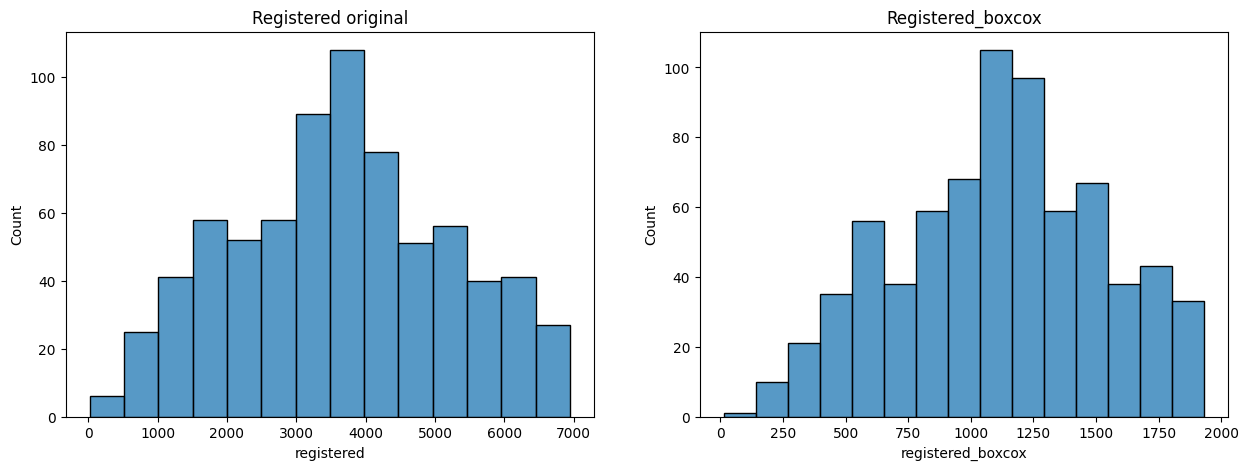

In [34]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Registered original')
axes[1].set_title('Registered_boxcox')

sns.histplot(df["registered"] ,ax = axes[0])
sns.histplot(df["registered_boxcox"], ax = axes[1]);

In [35]:
stats.shapiro(df["registered_boxcox"])

ShapiroResult(statistic=0.9854223132133484, pvalue=1.163151068794832e-06)

`Tras los resultados obtenidos, llegamos a la conclusión de que NO PODEMOS REALIZAR UN MODELO PREDICTIVO DE REGRESIÓN LINEAL 😔`